# 10 Year Analysis

In [13]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

In [14]:
gdp_df = pd.read_csv("finalgdp.csv")
gdp_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [15]:
HIV_df = pd.read_csv("finalhiv.csv")
HIV_df.drop("Unnamed: 0", axis = 1, inplace = True)

## Total Deaths over time

Text(0, 0.5, 'Deaths')

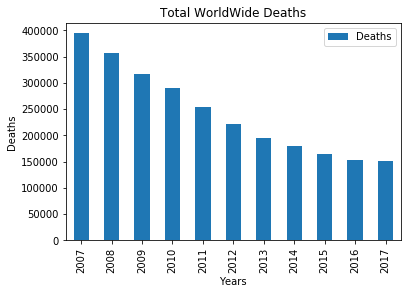

In [16]:
total_deaths = pd.DataFrame(HIV_df.sum())

total_deaths.drop('Country Name', inplace = True)

total_deaths.rename({0 : 'Deaths'}, axis = 1, inplace = True)

total_plot = total_deaths.plot.bar()
plt.title('Total WorldWide Deaths')
plt.xlabel('Years')
plt.ylabel('Deaths')

#fig = total_plot.get_figure()
#fig.savefig("total_deaths.png", bbox_inches = 'tight', dpi = 300)

## GDP Over Time

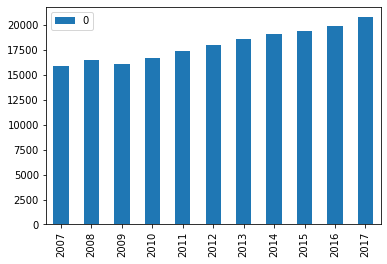

In [17]:
# Doesn't take into account inflation
average_gdp = pd.DataFrame(gdp_df.mean())

average_gdp.plot.bar()

## 10 Year Mean

Text(0.5, 1.0, 'Mean Deaths against Mean GDP (< $20000)')

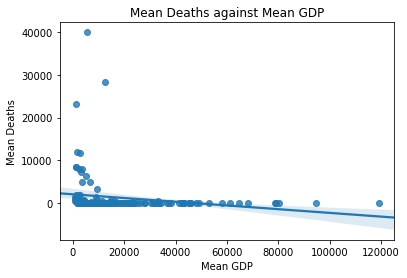

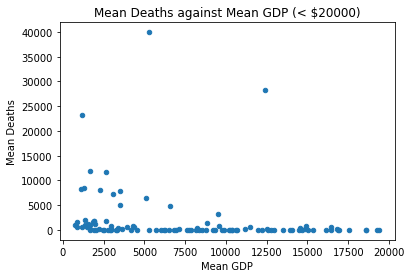

In [18]:
# GDP
average_gdp = gdp_df.filter(['Country Name'], axis=1)
average_gdp['Mean GDP'] = gdp_df.mean(axis = 1)

# HIV
average_HIV = HIV_df.filter(['Country Name'], axis=1)
average_HIV['Mean Deaths'] = HIV_df.mean(axis = 1)

# Combined Datasets
combined_df = pd.merge(average_gdp, average_HIV)

restricted1_df = combined_df
restricted1_plot = sns.regplot(x = 'Mean GDP', y = 'Mean Deaths', data = restricted1_df)
plt.title('Mean Deaths against Mean GDP')

#fig1 = restricted1_plot.get_figure()
#fig1.savefig("mean_death1", bbox_inches = 'tight', dpi = 300)


# Restricted Dataset

restricted2_df = combined_df[combined_df['Mean GDP'] < 20000]
restricted2_plot = restricted2_df.plot.scatter(x = 'Mean GDP', y = 'Mean Deaths')
plt.title('Mean Deaths against Mean GDP (< $20000)')

#fig2 = restricted2_plot.get_figure()
#fig2.savefig("mean_death2", bbox_inches = 'tight', dpi = 300)

In [19]:
corr_metric_df = combined_df.set_index('Country Name')
corr_metric_df.corr()

,Mean GDP,Mean Deaths
Mean GDP,1.000000,-0.188153
Mean Deaths,-0.188153,1.000000


## Most / Least Deaths per Country

Text(0.5, 1.0, 'Countries with highest total death count (2007-2017)')

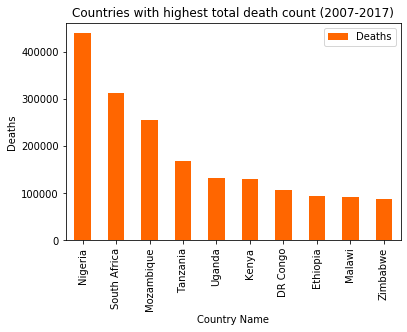

In [20]:
deaths_df = HIV_df.set_index('Country Name')
max_df = pd.DataFrame(deaths_df.sum(axis = 1))

max_df.rename({0 : 'Deaths'}, axis = 1, inplace = True)

max_df.rename({'United Republic of Tanzania' : 'Tanzania', 'Democratic Republic of the Congo' : 'DR Congo'}, inplace = True)

max_deaths_plot = max_df.sort_values(by = 'Deaths', ascending = False).head(10).plot.bar(color = '#ff6600')
plt.ylabel('Deaths')
plt.title('Countries with highest total death count (2007-2017)')

#fig = max_deaths_plot.get_figure()
#fig.savefig("max_deaths_plot.png", bbox_inches = 'tight', dpi = 300)

## Correlation Metric

In [28]:
# Further Cleaning

top_50 = pd.DataFrame(deaths_df.sum(axis = 1))

top_50.rename({0 : 'Deaths'}, axis = 1, inplace = True)

top_50_list = top_50.sort_values(by = 'Deaths', ascending = False).head(50).index

HIV_fix_df = HIV_df.copy()
gdp_fix_df = gdp_df.copy()


# Find absent country names and fix to match dataset

absent_gdp = top_50_list[top_50_list.isin(gdp_fix_df['Country Name']) == False]
absent_HIV = top_50_list[top_50_list.isin(HIV_fix_df['Country Name']) == False]

Congo = gdp_fix_df[gdp_fix_df['Country Name'].str.find('Con') != -1]
Cote_divoire = gdp_fix_df[gdp_fix_df['Country Name'].str.find('Ivoire') != -1]
Sudan = gdp_fix_df[gdp_fix_df['Country Name'].str.find('Sudan') != -1]
Vietnam = gdp_fix_df[gdp_fix_df['Country Name'].str.find('Viet') != -1]
Somalia = gdp_fix_df[gdp_fix_df['Country Name'].str.find('Som') != -1]
Tanzania = gdp_fix_df[gdp_fix_df['Country Name'].str.find('Tanzania') != -1]

# South Sudan and Somalia are non-existent in GDP. Therefore we must remove and take 2 more countries

top_50_list = top_50.sort_values(by = 'Deaths', ascending = False).head(52).index.drop(['Somalia', 'South Sudan'])

# We must rename the other countries in gdp_fix_df to match top_50_list

gdp_fix_df.replace({'Congo, Dem. Rep.' : 'Democratic Republic of the Congo', 'Cote d\'Ivoire' : 'Côte d\'Ivoire', 'Congo, Rep.' : 'Congo',
                   'Vietnam' : 'Viet Nam', 'Tanzania' : 'United Republic of Tanzania'}, inplace = True)


In [31]:
top_50_corr = pd.DataFrame(index = np.arange(0, 50), columns = ['Country Name', 'Correlation Score'])
top_50_corr['Country Name'] = top_50_list

# Loop through list taking the correlation score of each country in top 50

for x in range(50):
    country_HIV = HIV_fix_df[HIV_fix_df['Country Name'] == top_50_list[x]].set_index("Country Name").T.rename({top_50_list[x] : 'Deaths'}, axis = 1)
    country_GDP = gdp_fix_df[gdp_fix_df['Country Name'] == top_50_list[x]].set_index("Country Name").T.rename({top_50_list[x] : 'GDP'}, axis = 1)
    
    HIV_gdp = country_GDP.join(country_HIV)
    top_50_corr.loc[x]['Correlation Score'] = HIV_gdp['GDP'].corr(HIV_gdp['Deaths'])
    

mean_corr = top_50_corr['Correlation Score'].mean()

mean_corr

-0.5827662228229034

## Region

In [27]:
region = max_df

top_50 = region.sort_values(by = 'Deaths', ascending = False).head(50)

top_50.rename({'DR Congo' : 'Democratic Republic of the Congo'}, inplace = True)
    
    
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
countries = top_50.index

region_count = [continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))] for country in countries]

Africa = region_count.count('Africa')
Asia = region_count.count('Asia')
North_America = region_count.count('North America')
Australia = region_count.count('Australia')
Europe = region_count.count('Europe')

Africa_percentage = (Africa / 50) * 100

Africa_percentage


78.0

Text(0.5, 1.0, 'Top 50 Total Deaths (2007-2017)')

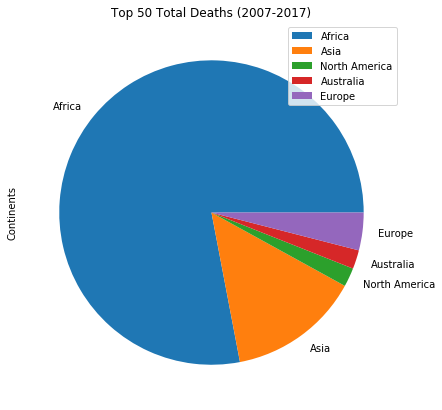

In [32]:
pie_df = pd.DataFrame({'Continents': [Africa, Asia, North_America, Australia, Europe],},
                  index = ['Africa', 'Asia', 'North America', 'Australia', 'Europe'])
pie_plot = pie_df.plot.pie(y = 'Continents', figsize=(7, 7))
plt.title('Top 50 Total Deaths (2007-2017)')

#fig = pie_plot.get_figure()
#fig.savefig("pie_deaths", bbox_inches = 'tight', dpi = 300)

## Outliers

In [33]:
outliers = combined_df[(combined_df["Mean Deaths"] > 20000) & (combined_df['Mean GDP'] > 5000)]
outliers

,Country Name,Mean GDP,Mean Deaths
102,Nigeria,5309.624580,39939.272727
155,South Africa,12403.402894,28317.727273


## Top 5 GDP Growth

In [34]:
# Dataframe Prep
compare_HIV = HIV_df[['Country Name', '2007', '2017']].copy()
compare_gdp = gdp_df[['Country Name', '2007', '2017']].copy()

compare_HIV.rename(columns = {'2007' : '2007_HIV', '2017' : '2017_HIV'}, inplace = True)
compare_gdp.rename(columns = {'2007' : '2007_GDP', '2017' : '2017_GDP'}, inplace = True)

compare = pd.merge(compare_gdp, compare_HIV)

compare = compare[['Country Name', '2007_GDP', '2007_HIV', '2017_GDP', '2017_HIV']]

Text(0, 0.5, 'Percentage')

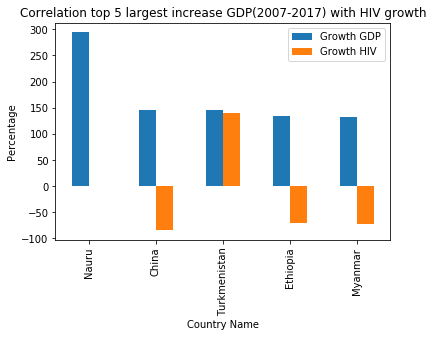

In [35]:
compare['Growth GDP'] = ((compare['2017_GDP'] - compare['2007_GDP']) / compare['2007_GDP']) * 100
compare['Growth HIV'] = ((compare['2017_HIV'] - compare['2007_HIV']) / compare['2007_HIV']) * 100

compare.replace([np.inf], np.nan, inplace=True)
compare.fillna(0, inplace=True)
compareGDP = compare.sort_values(by = 'Growth GDP', ascending = False)
biggest_increaseGDP = compareGDP[['Country Name', 'Growth GDP', 'Growth HIV']].head()

increase_plot = biggest_increaseGDP.plot.bar(x = 'Country Name', title = 'Correlation top 5 largest increase GDP(2007-2017) with HIV growth')
plt.ylabel('Percentage')

#fig = increase_plot.get_figure()
#fig.savefig("increase_gdp", bbox_inches = 'tight', dpi = 300)